In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [11]:
program_code_1HT = """ 
data {
  int<lower=0> hits; 
  int<lower=0> misses;
  int<lower=0> false_alarms; 
  int<lower=0> correct_rejections; 
  int<lower=0> n_old; 
  int<lower=0> n_new; 
}
parameters {
  real<lower=0,upper=1> d; // probability of detecting an old item
  real<lower=0,upper=1> g; // probability of guessing an item as old
}
model {
  // Priors
    d ~ beta(2, 2); 
    g ~ beta(2, 2); 
  
  // Likelihood
    hits ~ binomial(n_old, d); 
    misses ~ binomial(n_old, 1 - d);
    false_alarms ~ binomial(n_new, g); 
    correct_rejections ~ binomial(n_new, 1 - g); 
  }
"""

In [12]:
#Original List: Drum, Curtain, Bell, Coffee, School, Parent, Moon, Garden, Hat, Farmer, Nose, Turkey, Color, House, River, Desk, Ranger, Mountain, Glasses, Towel
#Modified List:     , Curtain, Bell,       , School, Parent,     , Garden,    ,       , Nose,       , Color,      , River,     ,       , Mountain,        , Towel

stan_dict = {
    'hits' : 7,
    'misses' : 3 ,
    'false_alarms' : 0,
    'correct_rejections' : 10,
    'N_old':20,
    'n_new':20
}

posterior = stan.build(program_code_1HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...

In file included from /Users/michaelchen/Library/Caches/httpstan/4.12.0/models/hvefm23v/model_hvefm23v.cpp:2:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/Eigen.hpp:23:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/Sparse:26:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/SparseCore:61:
/opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
In file included from /Users/micha

4 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable
ld: warning: object file (/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (11.0)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11.0-arm64-cpython-311/Users/michaelchen/Library/Caches/httpstan/4.12.0/models/hvefm23v/model_hvefm23v.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/si

RuntimeError: Error calling get_param_names: `Exception: variable does not exist; processing stage=data initialization; variable name=n_old; base type=int (in '/var/folders/2w/ncm57vw13pxfft0jj32fztn40000gn/T/httpstan_mu9829rk/model_hvefm23v.stan', line 7, column 2 to column 21)`

In [ ]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.591,0.073,0.459,0.732,0.001,0.001,4775.0,3329.0,1.0
g,0.274,0.067,0.151,0.400,0.001,0.001,4658.0,3358.0,1.0


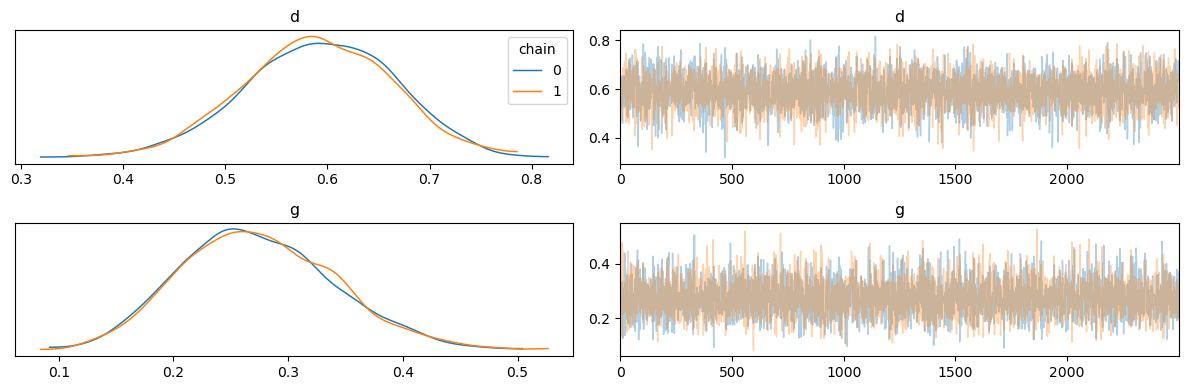

In [ ]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [14]:
program_code_2HT = """
data {
  int<lower=0> N_old; // Number of old items
  int<lower=0> N_new; // Number of new items
  int<lower=0, upper=N_old> X_old_old; // Number of old items identified as old
  int<lower=0, upper=N_old> X_old_new; // Number of old items identified as new
  int<lower=0, upper=N_new> X_new_old; // Number of new items identified as old
  int<lower=0, upper=N_new> X_new_new; // Number of new items identified as new
}

parameters {
  real<lower=0, upper=1> d; // Detection probability
  real<lower=0, upper=1> g; // Guessing probability
}

model {
  // Priors (Uniform priors are implicitly defined by the parameter bounds)
  
  // Likelihood for old items
  X_old_old ~ binomial(N_old, d);
  X_old_new ~ binomial(N_old, (1 - d) * g);
  
  // Likelihood for new items
  X_new_old ~ binomial(N_new, d);
  X_new_new ~ binomial(N_new, (1 - d) * (1 - g));
}
"""

In [15]:

stan_dict = {
    'N_old' : 20,
    'N_new' : 20,
    'X_old_old': 7,
    'X_old_new' : 0,
    'X_new_old': 10, 
    'X_new_new': 3
}

posterior = stan.build(program_code_2HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...

In file included from /Users/michaelchen/Library/Caches/httpstan/4.12.0/models/7mk46fgu/model_7mk46fgu.cpp:2:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/Eigen.hpp:23:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/Sparse:26:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/SparseCore:61:
/opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
In file included from /Users/micha

4 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable
ld: warning: object file (/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (11.0)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11.0-arm64-cpython-311/Users/michaelchen/Library/Caches/httpstan/4.12.0/models/7mk46fgu/model_7mk46fgu.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/si

In [16]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.543,0.068,0.419,0.670,0.001,0.001,3324.0,2836.0,1.0
g,0.228,0.152,0.000,0.495,0.003,0.002,2773.0,2466.0,1.0


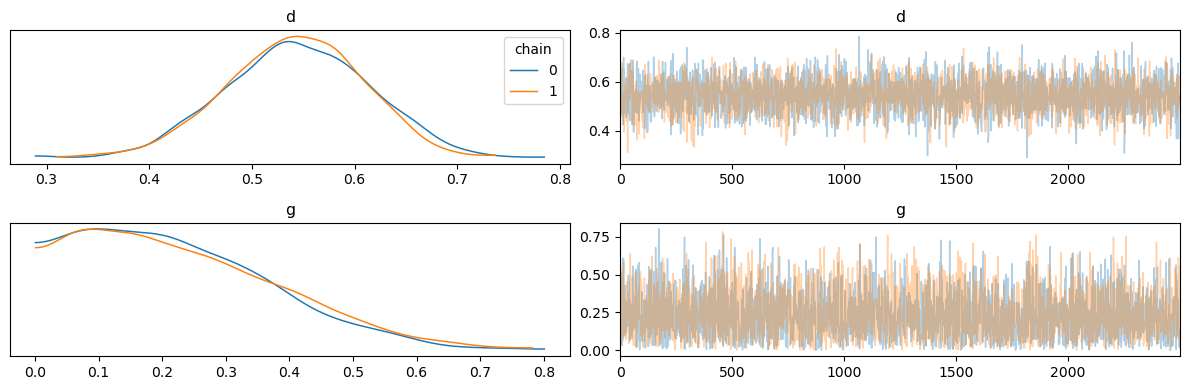

In [17]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()